<a href="https://colab.research.google.com/github/akaashpatel10/Complete-Python-3-Bootcamp/blob/master/Week7_LinearRegression_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week7 LinearRegression

In week 7, we've covered:
* Basic machine learning concepts and workflow
* Linear regression
  
  
In this notebook,  we will work on the Boston housing dataset and build a linear regression model to predict value of houses. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week7_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

In [38]:
# Mount your Google Drive on your runtime using an authorization code
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**TODO**: Replace **`YourFolderName`**  below with the folder name on your google drive where you put the `housing.csv` file. Run the cell, check if `housing.csv` is listed.

In [39]:
%ls /content/drive/My\ Drive

'06 04 Updated Pacing.gsheet'
'13KBMF6LRbuEET--y6CU6A (1).gsheet'
 13KBMF6LRbuEET--y6CU6A.gsheet
'20190607-FS Scavanger Hunt.gdoc'
'20190611-Loans Cheat Sheet.gdoc'
'20190614-CL History & Priority Changes.gslides'
'20190614-Loans SOTU Notes.gdoc'
 20190616_SUCO.gsheet
'20190620-Site Audit Notes_v1.gdoc'
'20190620-Site Audit Notes_v2.gdoc'
'20190621-FS Audit.gslides'
'20190627 - BT Product Data - Last 30 das .gsheet'
'2020 Q1 RPC Forecasting (PPC).gsheet'
'2. RAPID Scoring Sheet.docx'
'2. RAPID Scoring Sheet.gdoc'
'3. RAPID 360 Feedback Sheet for Employees.xlsx'
'3xuVe9yuT0-jXDYpQndw6Q (1).gsheet'
'3xuVe9yuT0-jXDYpQndw6Q (2).gsheet'
 3xuVe9yuT0-jXDYpQndw6Q.gsheet
'5. RVU Full Year Review Template 2019.docx'
'5. RVU Full Year Review Template 2019.gdoc'
'6. RVU Full Year Review FAQs.docx'
'6. RVU Full Year Review FAQs.gdoc'
'A B Test Dashboard Template in Tableau.gslides'
'A B Testing Documentation.gdoc'
'AEM Slides.gslides'
 akaash_good_burger_film.jpg
'Akaash Patel - Benefit: Life Assur

----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [40]:
# TODO  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [41]:
# TODO: Replace YourFolderName with the folder name on your google drive

data = pd.read_csv('/content/drive/My Drive/housing.csv')

# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

Boston housing dataset has 489 data points with 4 columns.


---
## 3. Explore Data

Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

In [42]:
# TODO: Get the first n rows of data
data.head(20)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [43]:
# TODO: Get a summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [44]:
# TODO: Calculate descriptive statistics 
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

In [45]:
# TODO: Declare `features` and `target` variables
features = data[['RM','LSTAT','PTRATIO']]
target = data[['MEDV']]

Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

In [46]:
# TODO: Minimum price of the data
minimum_price = target.min()

# TODO: Maximum price of the data
maximum_price = target.max()

# TODO: Mean price of the data
mean_price = target.mean()

# TODO: Median price of the data
median_price = target.median()

# TODO: Standard deviation of prices of the data
std_price = target.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $MEDV    105000.0
dtype: float64
Maximum price: $MEDV    1024800.0
dtype: float64
Mean price: $MEDV    454342.944785
dtype: float64
Median price $MEDV    438900.0
dtype: float64
Standard deviation of prices: $MEDV    165340.277653
dtype: float64


Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? 
  * Show the data using appropriate plot and justify your answer for each.

The higher the average number of rooms among houses in the neighbourhood, the higher the value of the house.



Text(0.5, 0, 'RM - Avg number of rooms')

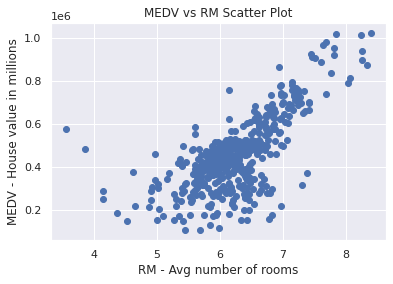

In [47]:
# TODO  
#'RM' is the average number of rooms among homes in the neighborhood.
print("The higher the average number of rooms among houses in the neighbourhood, the higher the value of the house.\n")

plt.scatter(features['RM'],target)
plt.title('MEDV vs RM Scatter Plot')
plt.ylabel('MEDV - House value in millions')
plt.xlabel('RM - Avg number of rooms')


The larger the percentage of homeowners in the neighbourhood considered lower class, the lower the value of the house.



Text(0.5, 0, 'LSTAT - % of lower class homeowners')

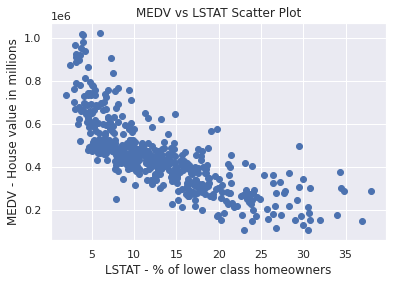

In [48]:
#'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
print("The larger the percentage of homeowners in the neighbourhood considered lower class, the lower the value of the house.\n")

plt.scatter(features['LSTAT'],target)
plt.title('MEDV vs LSTAT Scatter Plot')
plt.ylabel('MEDV - House value in millions')
plt.xlabel('LSTAT - % of lower class homeowners')

The larger the ration of students to teachers in the neighbourhood, the lower the value of the house.

There is a very loose relationship between LSTAT and MEDV. 
 This suggests that the number of students to teachers in schools is not an important factor in determining house value. 
 Perhaps more information is needed on the school itself.



Text(0.5, 0, 'PTRATIO - Ratio of students to teachers in neighborhood schools')

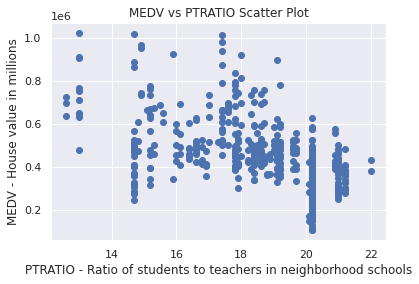

In [49]:
#'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.
print("The larger the ration of students to teachers in the neighbourhood, the lower the value of the house.\n")
print("There is a very loose relationship between LSTAT and MEDV. \n This suggests that the number of students to teachers in schools is not an important factor in determining house value. \n Perhaps more information is needed on the school itself.\n")

plt.scatter(features['PTRATIO'],target)
plt.title('MEDV vs PTRATIO Scatter Plot')
plt.ylabel('MEDV - House value in millions')
plt.xlabel('PTRATIO - Ratio of students to teachers in neighborhood schools')

**Answer**:    TODO  


----

## 4. Develop Model

Split data to get training and testing Data.

In [50]:
# TODO
# Split train and test (test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [51]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

#Standardisation
scaler = StandardScaler()
scaler.fit(features_train)
features_scaled = pd.DataFrame(data = scaler.transform(features_train), columns = features_train.columns.values)
features_scaled.head()


,RM,LSTAT,PTRATIO
0,-0.577296,-0.426571,0.806995
1,-0.124273,1.590671,1.265889
2,0.729786,0.646670,0.806995
3,0.264881,0.475288,0.806995
4,0.796625,-0.892952,1.174110


Why should we perform feature scailing?

**Answer**:    This is to normalise values so that we dont have instances of features with high magnitudes weighing a lot more than features with low magnitudes


Create linear regression object

In [52]:
# TODO 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [53]:
#from sklearn.feature_selection import f_regression


#f regression and p values
#f_regression(features,target)
#p_values.round(3)

Train/fit **lm** on the training data.

In [54]:
# TODO  
lm.fit(features_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [55]:
# TODO
#lm.coef_ -- calculate coefficients of Regression Model
#lm.intercept -- calculate intercept of Regression Model
#lm.p_values.round(3) --calculate p-values of Regression model

#Summary Table
lm_summary = pd.DataFrame(data = features_scaled.columns.values,columns = ['Features'])
lm_summary['Coefficients'] = lm.coef_[0]
lm_summary

,Features,Coefficients
0,RM,87322.203619
1,LSTAT,-10620.637315
2,PTRATIO,-19324.410296


## 5. Make Prediction

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict house prices for **X_test** data set.

In [56]:
# TODO
#reg.predict() -- predict target based on input. This can be a singular value or an entire dataframe
#go through same pre-processing as features_training
features_test = pd.DataFrame(data = scaler.transform(features_test), columns = features_test.columns.values)
target_hat = lm.predict(features_test)
target_hat

array([[341517.72165271],
       [429341.29256907],
       [436666.81882649],
       [267284.40683773],
       [401920.6613412 ],
       [328097.08077657],
       [300128.03509411],
       [615822.74302252],
       [308602.77436526],
       [477692.2855591 ],
       [397510.35927171],
       [345996.95683248],
       [295650.24456625],
       [279274.23964142],
       [449458.5703129 ],
       [431092.09407823],
       [386192.06976548],
       [375110.38311626],
       [417401.63471447],
       [378771.37376735],
       [403146.50217108],
       [399672.67263088],
       [401700.58183712],
       [553381.47606148],
       [409794.48905441],
       [394302.30909744],
       [421111.01568181],
       [507540.04550468],
       [543867.14527758],
       [261579.27161481],
       [461810.71503338],
       [297054.31510517],
       [431807.57301628],
       [410676.03636049],
       [304912.40342957],
       [407560.05549932],
       [488765.49885604],
       [403873.03257145],
       [5720

Create a scatterplot of **y_test** versus the predicted values.

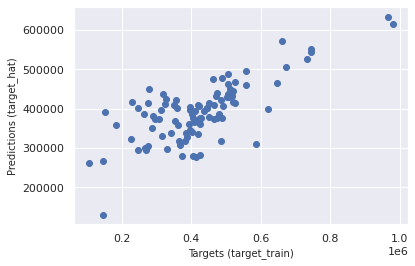

In [57]:
# TODO
plt.scatter(target_test,target_hat)
plt.xlabel('Targets (target_train)',size= 10)
plt.ylabel('Predictions (target_hat)',size=10)
plt.show()

Text(0.5, 1.0, 'Residuals Plot')

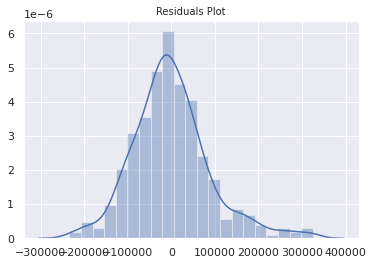

In [58]:
sns.distplot(target_train - lm.predict(features_train))
plt.title('Residuals Plot', size=10)

## 6. Evaluate Model

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 

Let's evaluate the model performance by calculating the Adjusted $R^2$.  

What's the benefit of using Adjusted $R^2$ versus $R^2$?

**Answer**:    TODO 


Now calculate Adjusted $R^2$ for train set and test set. Hint: $R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [37]:
# TODO  
#reg.score(features,target) -- R squared (unadjusted)
#n = features.shape()[0]
#p = features.shape()[1]
#adjusted_r2 = 1 - (1-r2**2)*(n-1)/(n-p-1)

r2_train = lm.score(features_train,target_train)
r2_test = lm.score(features_test,target_test)

n_features_train = features_train.shape[0]
n_features_test = features_test.shape[0]

p_features_train = features_train.shape[1]
p_features_test = features_test.shape[1]

def adjusted_r2(r2,n,p):
  return 1 - (1-r2**2)*(n-1)/(n-p-1)

adjusted_r2_train = adjusted_r2(r2_train,n_features_train,p_features_train)
adjusted_r2_test = adjusted_r2(r2_test,n_features_test,p_features_test)

print("R squared for training set is: " , adjusted_r2_train.round(3))
print("R squared for test set is: " , adjusted_r2_test.round(3))

R squared for training set is:  0.514
R squared for test set is:  0.18


## THE END, WELL DONE!

## Submission

Download completed **Week7_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.